# Avocado 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')
# allow plots to appear directly in the notebook
from subprocess import check_output
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor

In [2]:
df=pd.read_csv('avocado.csv')

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [4]:
df.drop("Unnamed: 0",axis=1,inplace=True)

In [5]:
names=['Date','AveragePrice','TotalVolume','Small','Large','XLarge','TotalBags','SmallBags',
      'LargeBags','XLargeBags','Type','Year','Region']
df=df.rename(columns=dict(zip(df.columns,names)))
df.head()

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16468 entries, 0 to 16467
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          1517 non-null   object 
 1   AveragePrice  1517 non-null   float64
 2   TotalVolume   1517 non-null   float64
 3   Small         1517 non-null   float64
 4   Large         1517 non-null   float64
 5   XLarge        1517 non-null   float64
 6   TotalBags     1517 non-null   float64
 7   SmallBags     1517 non-null   float64
 8   LargeBags     1517 non-null   float64
 9   XLargeBags    1517 non-null   float64
 10  Type          1517 non-null   object 
 11  Year          1517 non-null   float64
 12  Region        1517 non-null   object 
dtypes: float64(10), object(3)
memory usage: 1.6+ MB


In [7]:
df.describe(include='all')

,Date,AveragePrice,TotalVolume,Small,Large,XLarge,TotalBags,SmallBags,LargeBags,XLargeBags,Type,Year,Region
count,1517,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517,1517.000000,1517
unique,104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,51
top,12-04-2015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,conventional,NaN,California
freq,34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1517,NaN,76
mean,NaN,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,NaN,2015.162821,NaN
std,NaN,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,NaN,0.369324,NaN
min,NaN,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,NaN,2015.000000,NaN
25%,NaN,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,NaN,2015.000000,NaN
50%,NaN,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,NaN,2015.000000,NaN
75%,NaN,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,NaN,2015.000000,NaN


In [8]:
df.isnull().sum()

Date            14951
AveragePrice    14951
TotalVolume     14951
Small           14951
Large           14951
XLarge          14951
TotalBags       14951
SmallBags       14951
LargeBags       14951
XLargeBags      14951
Type            14951
Year            14951
Region          14951
dtype: int64

In [9]:
df['Type'].value_counts()

conventional    1517
Name: Type, dtype: int64

In [10]:
df['Region'].value_counts()

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Tampa                  34
Louisville             34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
Nashville              25
TotalUS                25
Denver                 24
SouthCarolina          24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
DallasFtWorth          17
MiamiFtLauderdale      17
Roanoke     

In [12]:
df['AveragePrice'].value_counts()

1.08    46
0.99    44
1.03    44
1.10    43
1.09    43
        ..
0.51     1
0.52     1
0.54     1
1.42     1
1.58     1
Name: AveragePrice, Length: 113, dtype: int64

In [13]:
df['TotalVolume'].value_counts()

64236.62      1
332918.70     1
4565207.85    1
4831664.77    1
309024.22     1
             ..
141875.20     1
92599.79      1
98097.37      1
162559.72     1
182978.30     1
Name: TotalVolume, Length: 1517, dtype: int64

In [14]:
df['Small'].value_counts()

1036.74       1
193228.98     1
2166801.03    1
2295315.43    1
180977.06     1
             ..
93556.40      1
57713.02      1
61125.82      1
110439.42     1
43116.41      1
Name: Small, Length: 1517, dtype: int64

In [15]:
df['Large'].value_counts()

54454.85      1
45809.76      1
1226508.86    1
1290847.05    1
46253.49      1
             ..
12101.67      1
9666.15       1
8956.16       1
11892.01      1
54193.42      1
Name: Large, Length: 1517, dtype: int64

In [16]:
df['XLarge'].value_counts()

57.68        2
48.16        1
271514.98    1
392846.12    1
12923.45     1
            ..
834.92       1
796.53       1
995.43       1
411.40       1
16563.91     1
Name: XLarge, Length: 1516, dtype: int64

In [17]:
df['SmallBags'].value_counts()

8603.62      1
64068.23     1
555356.92    1
663310.00    1
52556.00     1
            ..
14261.06     1
14116.28     1
19339.98     1
14379.48     1
57456.21     1
Name: SmallBags, Length: 1517, dtype: int64

In [18]:
df['LargeBags'].value_counts()

0.00        134
48.89         3
8.89          3
217.78        2
31.11         2
           ... 
16305.28      1
11727.21      1
6720.88       1
10414.35      1
11648.35      1
Name: LargeBags, Length: 1377, dtype: int64

In [19]:
df['XLargeBags'].value_counts()

0.00        798
1.63          2
7.08          2
25.26         2
6.16          2
           ... 
17202.07      1
23926.61      1
4465.52       1
3754.42       1
825.00        1
Name: XLargeBags, Length: 711, dtype: int64

In [20]:
#EDA
df.Type.unique()

array(['conventional', nan], dtype=object)

In [21]:
df.Year.unique()

array([2015., 2016.,   nan])

<AxesSubplot:xlabel='AveragePrice', ylabel='Type'>

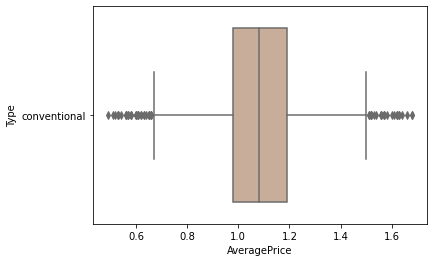

In [22]:
# Type of Avocado vs Average Price
sns.boxplot(y='Type',x='AveragePrice',data=df,palette = 'pink')

In [23]:
label = LabelEncoder()
dicts = {}

label.fit(df.Type.drop_duplicates())
dicts['Type']=list(label.classes_)
df.Type=label.transform(df.Type)

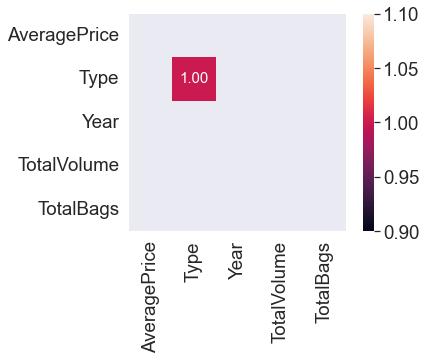

In [24]:
cols=['AveragePrice','Type','Year','TotalVolume','TotalBags']
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.7)
hm=sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size':15},yticklabels=cols, xticklabels=cols)

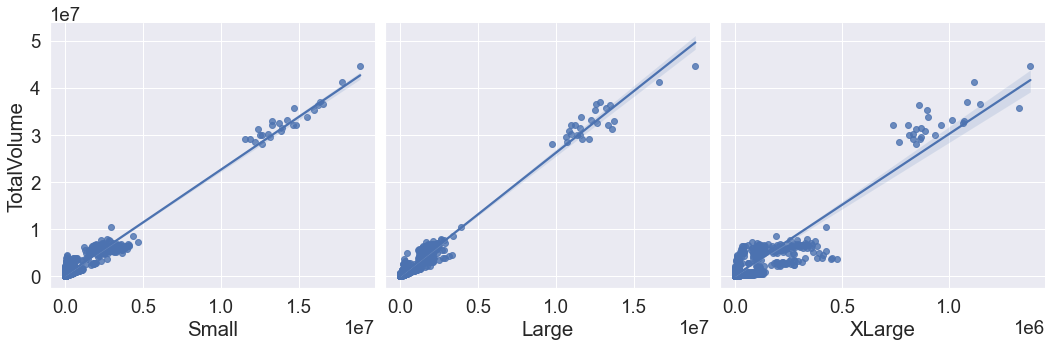

In [25]:
# total volume vs small, large and xlarge
sns.pairplot(df,x_vars=['Small','Large','XLarge'],y_vars='TotalVolume', size=5,aspect=1, kind='reg')

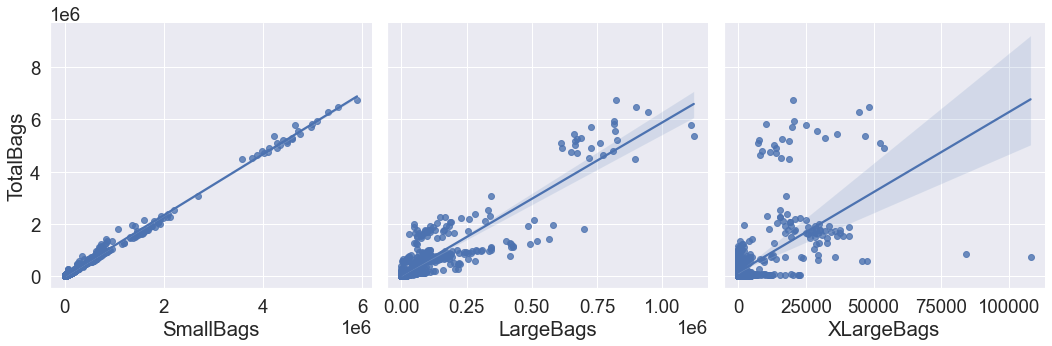

In [26]:
sns.pairplot(df,x_vars=['SmallBags','LargeBags','XLargeBags'],y_vars='TotalBags', size=5,aspect=1, kind='reg')

Text(0.5, 1.0, 'Yearly Average Price in Each Region')

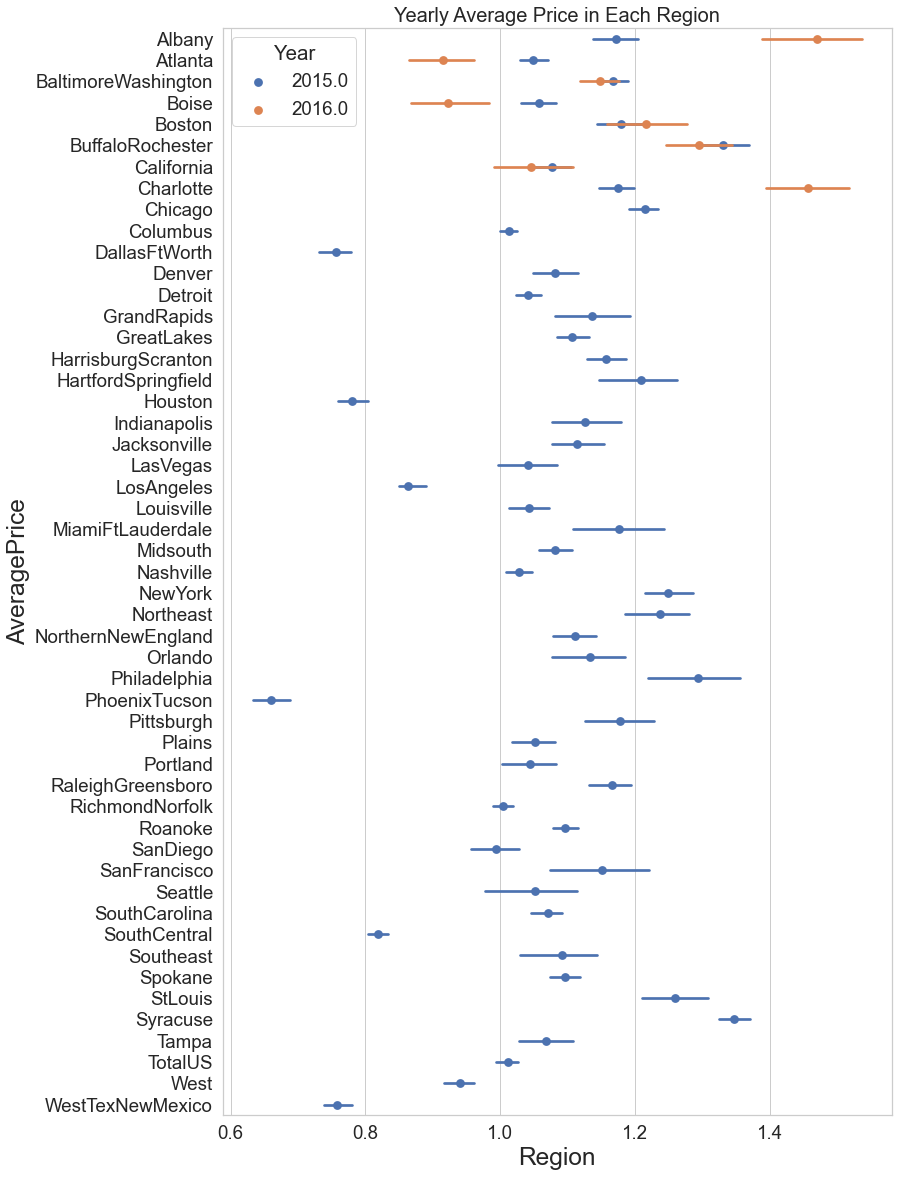

In [27]:
# region vs year distribution

plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='Region',data=df,hue='Year',join=False)
plt.xlabel(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize':'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Yearly Average Price in Each Region",{'fontsize':20})

Text(0.5, 1.0, 'Type Average Price in Each Region')

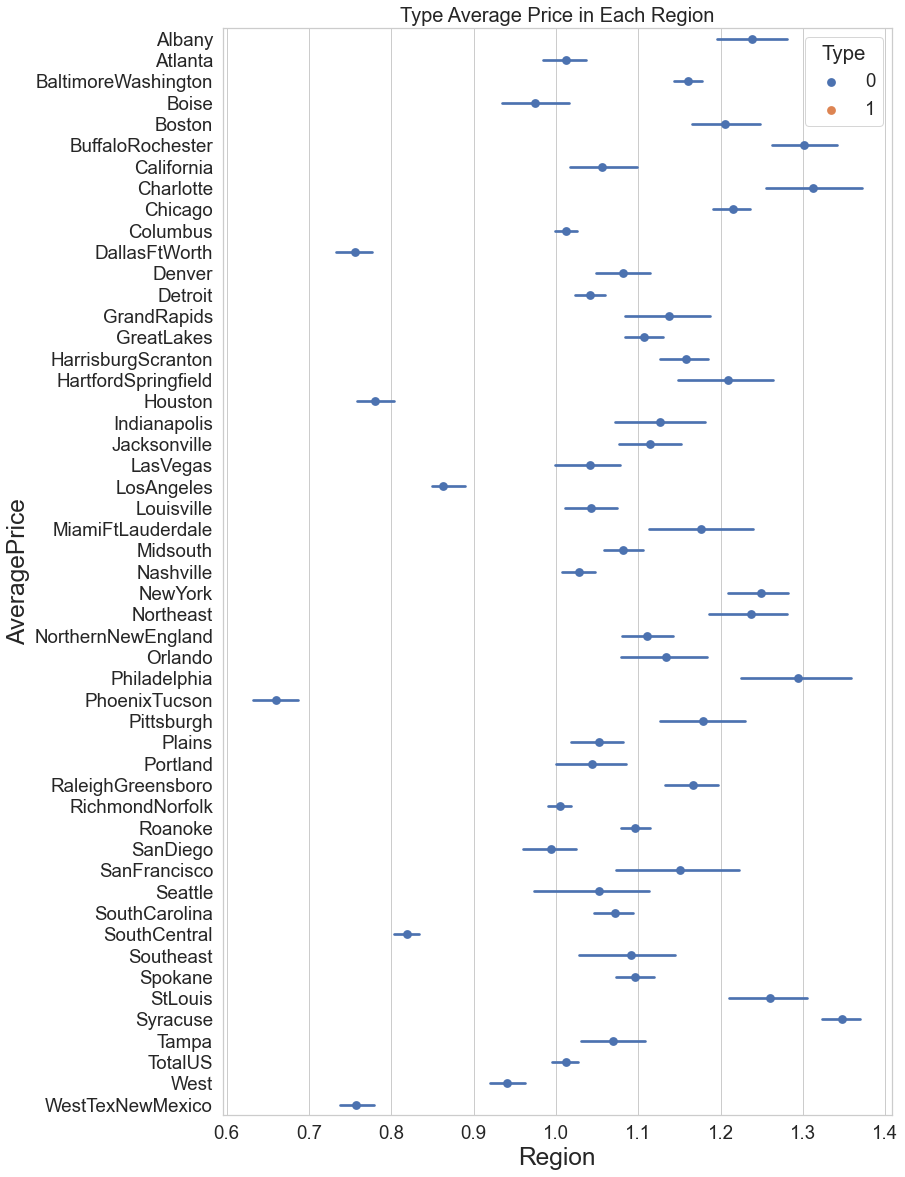

In [28]:
# region vs averageprice distribution
plt.figure(figsize=(12,20))
sns.set_style('whitegrid')
sns.pointplot(x='AveragePrice',y='Region',data=df,hue='Type',join=False)
plt.xlabel(np.linspace(1,2,5))
plt.xlabel('Region',{'fontsize':'large'})
plt.ylabel('AveragePrice',{'fontsize':'large'})
plt.title("Type Average Price in Each Region",{'fontsize':20})

In [29]:
# type of avocado
# using Logistic regression

X=df[['AveragePrice','Small','Large','XLarge','SmallBags','LargeBags','XLargeBags']]
y=df.Type

In [30]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20,random_state=1)

In [31]:
X_train.shape

(13174, 7)

In [32]:
y_train.shape

(13174,)

In [37]:
X_test.shape

(3294, 7)

In [33]:
y_test.shape

(3294,)

In [34]:
#Logistic Regression

logreg = LogisticRegression()

In [46]:
logreg.fit(X_train,y_train)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').